## _Шипилова Полина, 303_
## _Задача №7_
# _Двумерное уравнение теплопроводности_

###  _Постановка задачи:_
Используя метод переменных направлений, решить краевую задачу:

$$\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} = \Delta u, 0<x<\pi/2, 0<y<\pi/2, t>0\\
& \frac{\partial u}{\partial x}\big|_{x=0}=\frac{\partial u}{\partial x}\big|_{x=\pi}=0\\
& \frac{\partial u}{\partial y}\big|_{y=0}=\frac{\partial u}{\partial y}\big|_{y=\pi/2}=0\\
& u\big|_{t=0}=cos4x\ cos2y
\end{aligned} \right. \label{eq1}
\end{equation} $$

###  _Аналитическое решение задачи_
Будем искать решение задачи в виде:
$$u(x,y,t)=T(t)V(x,y)$$
Тогда, решая исходную задачу методом разделения переменных, получаем:

$$\frac{T'(t)}{T(t)}=\frac{V''(x,y)}{V(x,y)}=-\lambda$$

Имеем задачу Штурма-Лиувилля для $V$:

$$
\left\{
\begin{aligned}
& V'' +\lambda V = 0\\
& \frac{\partial V}{\partial x}\big|_{x=0}=\frac{\partial V}{\partial x}\big|_{x=\pi/2}=0\\
& \frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=\pi/2}=0
\end{aligned} \right. \label{eq3} 
$$

Теперь, представляя функцию $V$ в виде $V(x,y)=X(x)Y(y)$ и применяя метод разделения переменных, получим две задачи Штурма-Лиувилля на отрезке:

 $$  \left\{
\begin{aligned}
& X''+\nu X = 0\\
& X' \big|_{x=0}= X' \big|_{x=\pi/2}=0\\
\end{aligned} \right.   \Rightarrow X=cos(\sqrt{\nu} x) \hspace{20pt} \left\{
\begin{aligned}
& Y''+\mu Y = 0\\
&  \frac{\partial Y}{\partial y}\big|_{y=0}=\frac{\partial Y}{\partial y}\big|_{y=\pi/2}=0
\end{aligned} \right. \Rightarrow Y=cos(\sqrt{\mu} y) $$

где  $\nu = 4n^{2}$, $\mu = 4m^{2}$, $\lambda=\mu+\nu$

Тогда для функции $V$ получаем: $V_{nm}=cos(2nx)cos(2my)$

Из начальных условий получаем, что $ n=2, m=1 \Rightarrow \lambda =20 $.

Для $T(t)$ нужно решить следующую задачу:
$$
\begin{equation}\label{eq19} 
     \begin{cases}
     T'_{n,m}+ \lambda_{n,m}T_{n,m} = 0,\ t>0,\\
     T_{n,m}|_{t=0} = \varphi_{n,m},
     \end{cases}
\end{equation}
$$

где $\varphi(x,y) = \cos(4x)\cos(2y)$, а $\varphi_{n,m}$ - коэффициенты разложения функции $\varphi_(x,y)$ в ряд Фурье по системе функций ${V_{n,m}(x,y)}$.

Тогда, с учетом, что решение представляется в виде: 

$$V= \sum\limits_{n=0}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$
 
Получаем решение: $$u(x,y,t)=cos(4x)cos(2y)e^{-20t}$$

###  _График аналитического решения_
Построим график аналитического решения:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import clear_output

In [72]:
N, M, T = 100, 100, 100
x_start, x_end = 0, pi/2
y_start, y_end = 0, pi/2
t_start, t_end = 0, 1
tau= t_end / (T)
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,M) 
t = np.linspace(t_start,t_end,T)

In [73]:
u_a = np.zeros((N,M,T))
print('Calculating...')
for n in range(0,N): 
    clear_output(wait = True)
    print(f'Progress: {round(n/(N-1)*100)}%')
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=cos(4*x[n])*cos(2*y[m])*exp(-20*j*tau)
print('Done!')

Progress: 100%
Done!


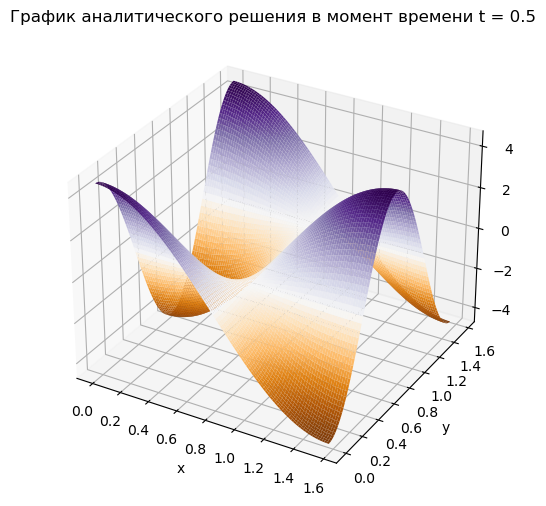

In [74]:
x1,y1 = np.meshgrid(x,y)

fig1 = plt.figure(figsize=(8,6))
o1 = fig1.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(x1, y1, u_a[:,:,int(T/2)], rstride = 1, cstride = 1, cmap = cm.PuOr)
# o1.view_init(30, 90)
plt.title('График аналитического решения в момент времени t = ' + str(round(tau*T/2,2)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

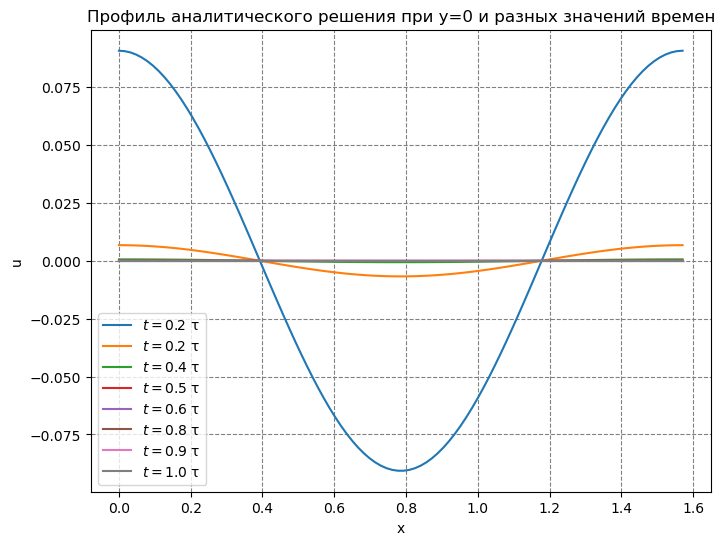

In [75]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического решения при y=0 и разных значений времен')

plt.plot(x, u_a[:,0,int(T/8)],label='$t=$' + str(round(tau*T/6,1)) + ' τ')
plt.plot(x, u_a[:,0,int(2*T/8)],label='$t= $' +str(round(tau*2*T/8,1)) + ' τ')
plt.plot(x, u_a[:,0,int(3*T/8)],label='$t= $' +str(round(tau*3*T/8,1)) + ' τ')
plt.plot(x, u_a[:,0,int(4*T/8)],label='$t= $' +str(round(tau*4*T/8,1)) + ' τ')
plt.plot(x, u_a[:,0,int(5*T/8)],label='$t= $' +str(round(tau*5*T/8,1)) + ' τ')
plt.plot(x, u_a[:,0,int(6*T/8)],label='$t= $' +str(round(tau*6*T/8,1)) + ' τ')
plt.plot(x, u_a[:,0,int(7*T/8)],label='$t= $' +str(round(tau*7*T/8,1)) + ' τ')
plt.plot(x, u_a[:,0,T-1],label='$t= $' +str(round(tau*8*T/8,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Таким образом, можно видеть, что с течением времени перенос тепла будет уменьшаться. Причем скорость уменьшения определяется экспоненциальным множетилем, а форма изменяться не будет  и определяется множителями синусом и косинусом.

## _Численное решение_

### _Разностная схема_

Введем разностную сетку в области $D$ = $G\times[0,T]$, $G = \{(x,y): 0 \leq x \leq \pi/2, 0 \leq y \leq \pi/2 \}$ с $N_x$ и $N_y$ числом узлов вдоль оси $x$ и $y$ и шагами $h_x$ и $h_y$ соответственно, с шагом $\tau$ и числом узлов $M$ по времени:

$$
\begin{equation}\label{grid}
	\begin{cases}
		{\omega}_x \equiv \{x_n = nh_x;~n = 0, 1, ... , N;~h_xN_x = \pi/2\}\\
		{\omega}_y \equiv \{y_m = mh_y;~m = 0, 1, ... , N_y;~h_yN_y = \pi/2\}\\
		{\omega}_t \equiv \{t_k = k\tau;~k = 0, 1, ... , M;~\tau M = T\}
	\end{cases}
\omega_{xyt} = \omega_x\times\omega_y\times\omega_t
\end{equation}
$$
    
При решении задачи положим $T = 0.2$. Введем сеточную функцию: $u_{n,m}^k = u(x_n,y_m,t_k).$

Запишем разностную апроксимацию оператора Лапласа:

$$
    \begin{gather}
    \Delta u = \frac{\partial^2 u}{\partial^2 x} + \frac{\partial^2 u}{\partial^2 y} \label{eq33} \\
    \Lambda u^{k}_{n,m} = \Lambda_{x}u^{k}_{n,m} + \Lambda_{y}u^{k}_{n,m} \label{eq34} \\
    \Lambda_{x}u^{k}_{n,m} = \frac{u^{k}_{n+1,m}-2u^{k}_{n,m}+u^{k}_{n-1,m}}{h^{2}_{x}} \label{eq35} \\
    \Lambda_{y}u^{k}_{n,m} = \frac{u^{k}_{n,m+1}-2u^{k}_{n,m}+u^{k}_{n,m-1}}{h^{2}_{y}} \label{eq36} 
    \end{gather}
$$

Тогда уравнение для сеточной функции неявной схемы выглядит следующим образом:

$$
\begin{equation}\label{eq37}
     \frac{u^{k+1}_{n,m} - u^{k}_{n,m}}{\tau} = \Lambda u_{n,m}^{k+1} 
\end{equation}
$$

Аппроксимируем начальные и граничные условия задачи \eqref{eq1}:

$$
    \begin{gather}
    u_{n,m}^0 = \cos (4nh_x) \cos (2mh_y), \ n = 0, 1, ... , N_x,\ m = 0, 1, ... , N_y \label{eq38} \\
    \frac{u_{1,m}^k-u_{0,m}^k}{h_x} = \frac{u_{N_x,m}^k-u_{N_x-1,m}^k}{h_x} = 0, \ m = 0, 1, ... , N_y,\ k = 0, 1, ... , M\label{eq39} \\
    \frac{u_{n,1}^k-u_{n,0}^k}{h_y} = \frac{u_{n,N_y}^k-u_{n,N_y-1}^k}{h_y} = 0, \ n = 0, 1, ... , N_x,\ k = 0, 1, ... , M \label{eq40} 
    \end{gather}
$$


### _Метод переменных направлений_

При решении будем использовать метод переменных направлений, для чего введем промежуточный временной слой $t_{k+1/2} = \tau (k+1/2)$. Тогда на первом полуслое (от $t_{k}$ до $t_{k+1/2}$)  будем решать задачу, неявную по
направлению $x$ и явную по направлению $y$, а на втором полуслое (от $t_{k+1/2}$ до $t_{k+1}$) - явную по направлению $x$ и неявную по направлению $y$. Данная схема абсолютно устойчива.

Для первого и второго полуслоя задачи ставятся следующим образом:

$$
    \begin{gather}
    \frac{u^{k+1/2}_{n,m} - u^{k}_{n,m}}{\tau /2} = \Lambda_xu^{k+1/2}_{n,m} + \Lambda_yu^{k}_{n,m} \label{eq41} \\
	\frac{u^{k+1}_{n,m} - u^{k+1/2}_{n,m}}{\tau /2} = \Lambda_xu^{k+1/2}_{n,m} + \Lambda_yu^{k+1}_{n,m}\label{eq42} 
    \end{gather}
$$

Решение задач \eqref{eq41}, \eqref{eq42} будем проводить методом прогонки. 



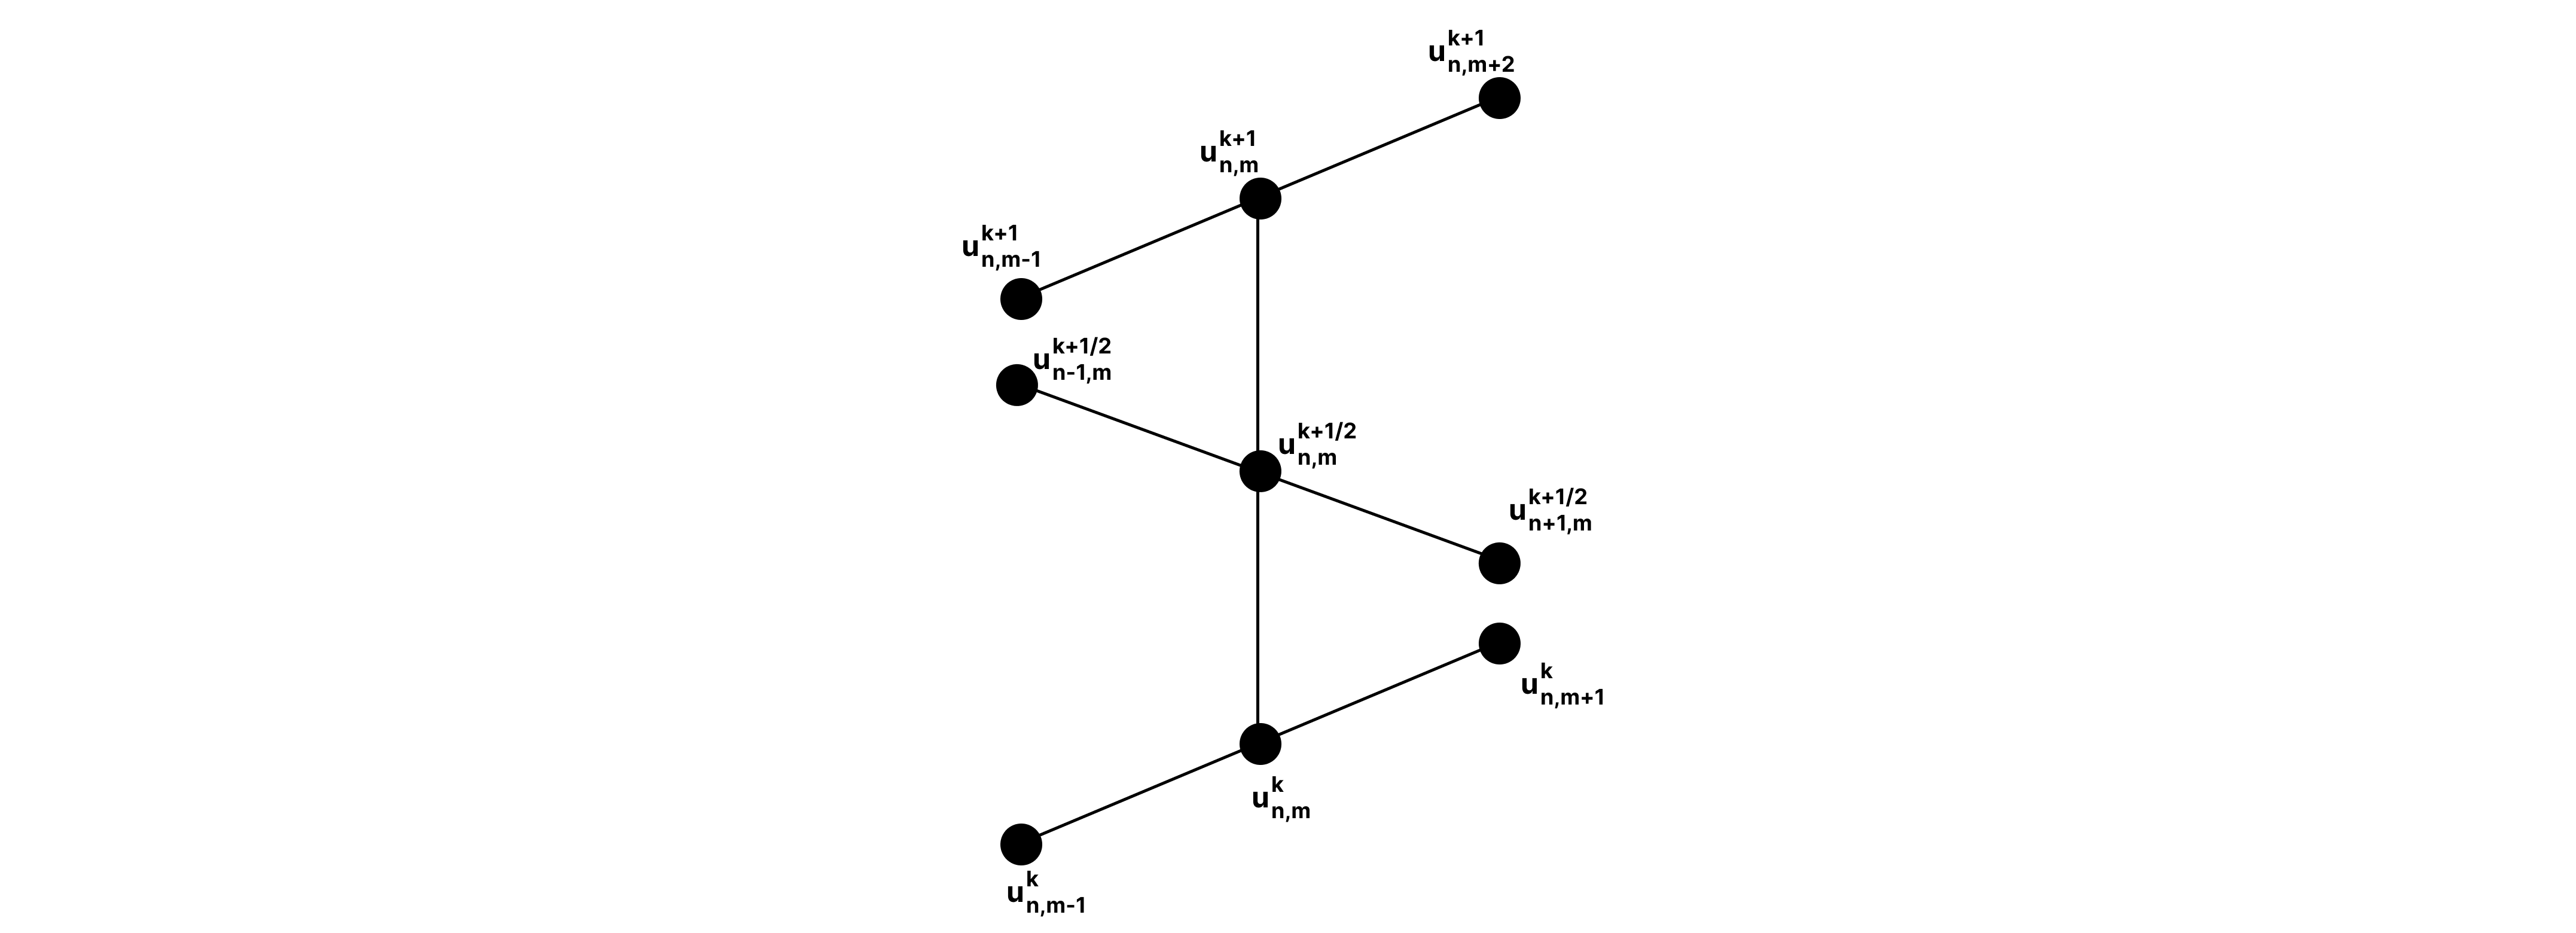

### _Метод прогонки_
Рассмотрим задачу \eqref{eq41}. Раскроем оператор Лапласа и умножим на $\tau/2$ с обеих сторон:

$$
\begin{equation}\label{eq43}
     u^{k+1/2}_{n,m} - u^{k}_{n,m} = \frac{\tau}{2}\frac{u^{k+1/2}_{n+1,m} -2 u^{k+1/2}_{n,m} + u^{k+1/2}_{n-1,m}}{h_{x}^2} + \frac{\tau}{2}\frac{u^{k}_{n,m+1} -2 u^{k}_{n,m} + u^{k}_{n,m-1}}{h_{y}^2}
\end{equation}
$$

Обозначим неизвестные - $u^{k+1/2}_{n+1,m}, u^{k+1/2}_{n,m}, u^{k+1/2}_{n-1,m}$ - соответственно $y_{n+1}, y_{n}, y_{n-1}$. Перепишем уравнение \eqref{eq43} в виде:

$$
\begin{equation}\label{eq44}
     A_n y_{n-1} + B_n y_{n} + C_n y_{n+1} = F_n,
\end{equation}
$$

где 
$$
    \begin{gather}
    A_n = \frac{\tau}{2h_x^2} \label{eq45} \\
	B_n = -1-\frac{\tau}{h_x^2} \label{eq46} \\
	C_n = \frac{\tau}{2h_x^2} \label{eq47} \\
	F_n = - \frac{\tau}{2}\frac{u^{k}_{n,m+1} -2 u^{k}_{n,m} + u^{k}_{n,m-1}}{h_{y}^2} - u^{k}_{n,m} \label{eq48}
    \end{gather}
$$

Каждое предыдущее значение $y_n$ можно выразить через последующее (формула обратной прогонки):

$$
\begin{equation}\label{eq49}
     y_{n} = \alpha_{n+1}y_{n+1}+\beta_{n+1}
\end{equation}
$$

Подставим выражение для $y_{n-1}$ в \eqref{eq44}:

$$
    \begin{gather}
    A_n (\alpha_{n}y_{n}+\beta_{n}) + B_n y_{n} + C_n y_{n+1} = F_n \label{eq50} \\
	y_{n} = -\frac{C_n}{\alpha_{n} A_n + B_n} y_{n+1}+\frac{F_n-A_n \beta_{n}}{\alpha_{n} A_n + B_n} \label{eq51} 
    \end{gather}
$$

Сравнивая выражения \eqref{eq49} и \eqref{eq51}, получаем:

$$
    \begin{gather}
    \alpha_{n+1} =  -\frac{C_n}{\alpha_{n} A_n + B_n} \label{eq52} \\
	\beta_{n+1} = \frac{F_n-A_n \beta_{n}}{\alpha_{n} A_n + B_n} \label{eq53} 
    \end{gather}
$$

Мы получили формулы прямой прогонки.
Из граничных условий мы получаем, что:

$$
    \begin{gather}
    \frac{y_1 - y_0}{h_x} =  0 \label{eq54} \\
	y_0 = \alpha_{1} y_1 + \beta_{1} = y_1 \ \Rightarrow \ \alpha_{1} = 1, \beta_{1} = 0 \label{eq55} \\
	\frac{y_{N_x} - y_{N_x-1}}{h_x} =  0 \label{eq56} \\
	y_{N_x-1} = \alpha_{N_x} y_{N_x} + \beta_{N_x} = y_{N_x} \ \Rightarrow \ y_{N_x} = \frac{\beta_{N_x}}{1 - \alpha_{N_x}} \label{eq57}
    \end{gather}
$$

Аналогично мы решаем неявную задачу по $y$. Поскольку граничные условия в нашей задаче совпадают, разницы не будет. 

### _Програмная реализация численного решения_

In [98]:
N, M, T = 100, 100, 100

h_x=x_end/(N-1)
h_y=y_end/(M-2)
tau= t_end/ T
gamma_1 = tau / (h_x**2)
gamma_2 = tau / (h_y**2)

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start-h_y/2,y_end+h_y/2,M) 
t = np.linspace(t_start,t_end,T) 
u=np.zeros((N,M,2*T+1)) 

for n in range(0,N):              
    for m in range(0,M):
        u[n,m,0]=cos(4*x[n])*cos(2*y[m])

In [37]:
def progonka_X(m,j):
    alpha=np.zeros(N)     # последний эллемент имеет индекс N-1        
    beta = np.zeros(N)
    alpha[1] = 0    
    beta[1] = 0
    A_x = 0.5 * gamma_1
    B_x = 1 + gamma_1
    C_x = 0.5 * gamma_1
    
    u[0,m,j]= 0
    for n in range (1,N-1): # прямая прогонка 
        F_x = 0.5 * gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1] # проверить индексы по j
        alpha[n+1] = C_x / (B_x - A_x * alpha[n])
        beta[n+1] = (F_x + A_x * beta[n]) / (B_x-A_x * alpha[n])

    u[N-1,m,j] = 0
    for n in range(N-1,0,-1):   # обратная прогонка               
        u[n-1,m,j]=alpha[n] * u[n,m,j] + beta[n] 

In [38]:
def progonka_Y(n,j):
    alpha=np.zeros(M)
    beta = np.zeros(M)
    alpha[1] = 1
    beta[1] = 0
    A_y = 0.5 * gamma_2
    B_y= 1 + gamma_2
    C_y= 0.5 * gamma_2
    for m in range (1,M-1): # прямая прогонка
        F_y = 0.5 *gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]
        alpha[m+1] = C_y / (B_y - A_y * alpha[m])  
        beta[m+1] = (F_y + A_y * beta[m]) / (B_y-A_y * alpha[m])
    
    u[n,M-1,j]=beta[-1]/(1-alpha[-1]) # обратная прогонка
    for m in range(M-1,0,-1):                  
        u[n,m-1,j]=alpha[m] * u[n,m,j] + beta[m] 

In [99]:
for j in range(1,2*T+1,2):
    clear_output(wait = True)
    print(f'Progress: {round(j/(2*T)*100)}%')
    for m in range(1,M-1):
        progonka_X(m,j)
    for n in range(1,N-1):
        progonka_Y(n,j+1)
    for m in range(0,M):
        u[0,m,j+1]=0
        u[N-1,m,j+1]=0
print('Done!')

Progress: 100%
Done!


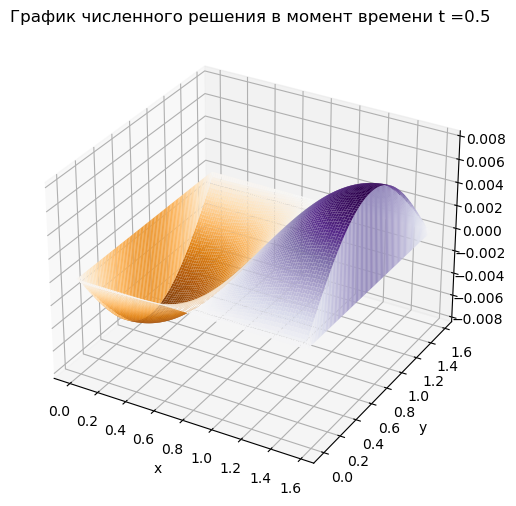

In [100]:
x1,y1 = np.meshgrid(x,y)

fig1 = plt.figure(figsize=(9,6))
o1 = fig1.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(x1, y1, u[:,:,int(T-1)], rstride = 1, cstride = 1, cmap = cm.PuOr)
# o1.view_init(30, 90)
plt.title('График численного решения в момент времени t =' +str(round(tau*T/2,2)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

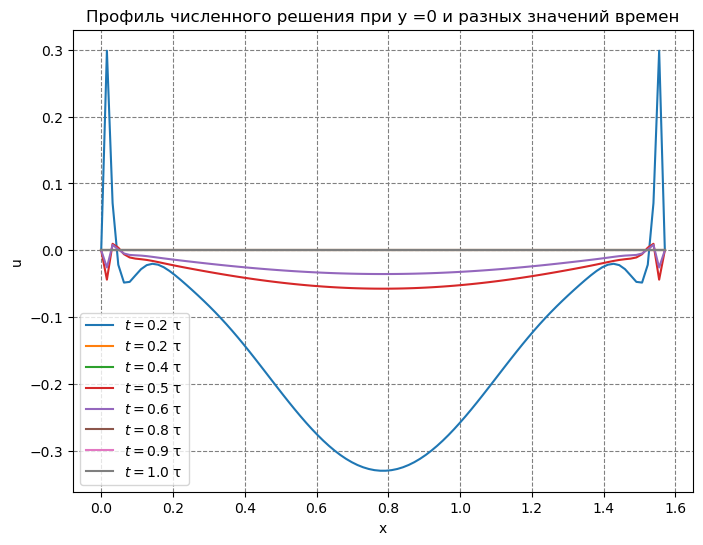

In [101]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль численного решения при y =' +str(0) + ' и разных значений времен')

plt.plot(x, u[:,0,int(T/8)],label='$t=$' + str(round(tau*T/6,1)) + ' τ')
plt.plot(x, u[:,0,int(2*T/8)],label='$t= $' +str(round(tau*2*T/8,1)) + ' τ')
plt.plot(x, u[:,0,int(3*T/8)],label='$t= $' +str(round(tau*3*T/8,1)) + ' τ')
plt.plot(x, u[:,0,int(4*T/8)],label='$t= $' +str(round(tau*4*T/8,1)) + ' τ')
plt.plot(x, u[:,0,int(5*T/8)],label='$t= $' +str(round(tau*5*T/8,1)) + ' τ')
plt.plot(x, u[:,0,int(6*T/8)],label='$t= $' +str(round(tau*6*T/8,1)) + ' τ')
plt.plot(x, u[:,0,int(7*T/8)],label='$t= $' +str(round(tau*7*T/8,1)) + ' τ')
plt.plot(x, u[:,0,T-1],label='$t= $' +str(round(tau*8*T/8,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Как видно, у численного решения, также, каки у аналитического, наблюдается тенденция уменьшения с течением времени.

###  _Погрешность_

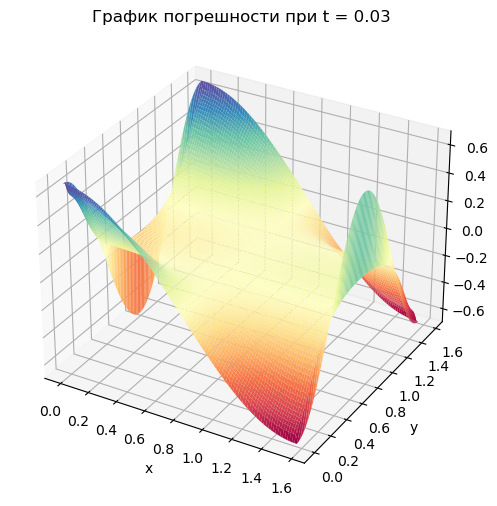

In [102]:
x1,y1 = np.meshgrid(x,y)

fig1 = plt.figure(figsize=(9,6))
o1 = fig1.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(x1, y1, u_a[:,:,int(T/40)]-u[:,:,int(T/20)], rstride = 1, cstride = 1, cmap = cm.Spectral)
# o1.view_init(30, 90)
plt.title('График погрешности при t = ' +str(round(tau*T/40,2)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### _Сгущение сетки_

N = M = J = 10

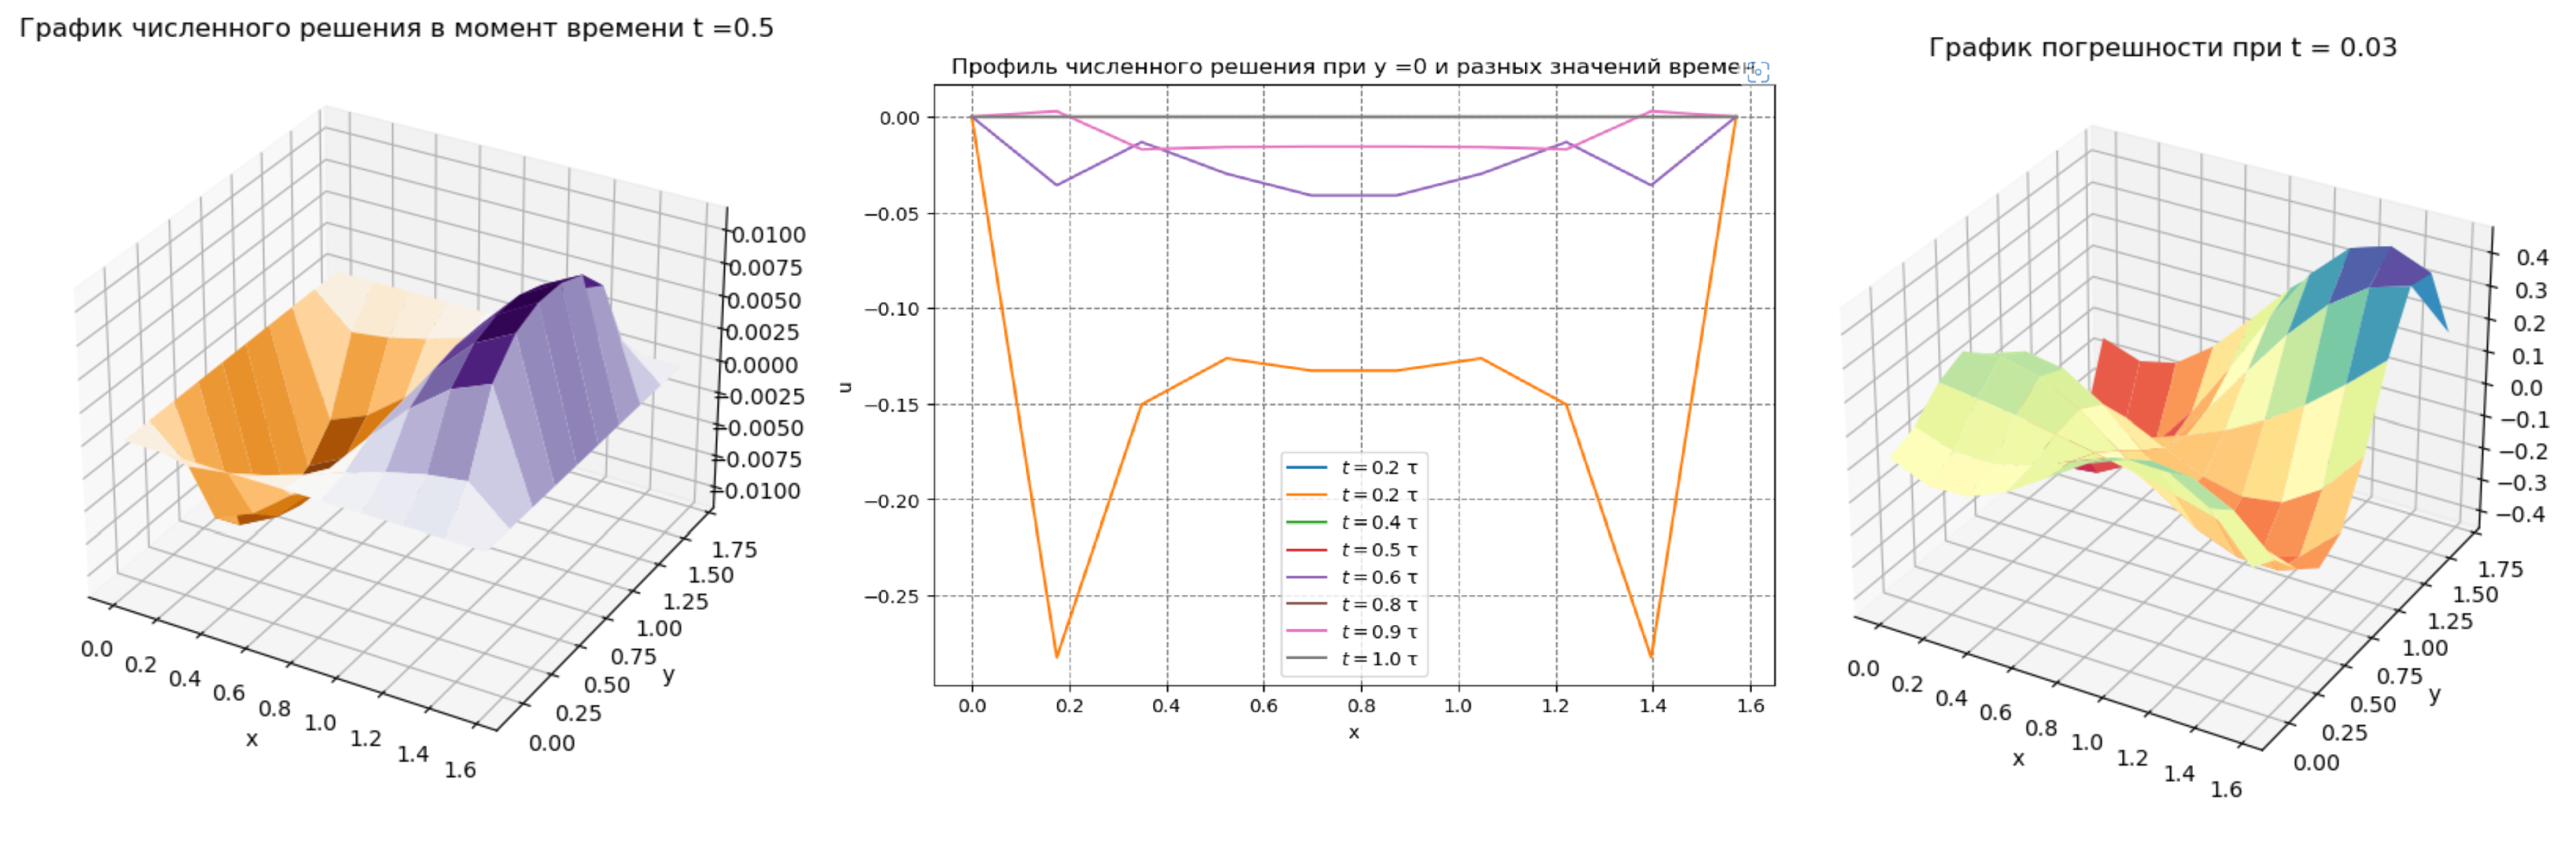

N = M = J = 20

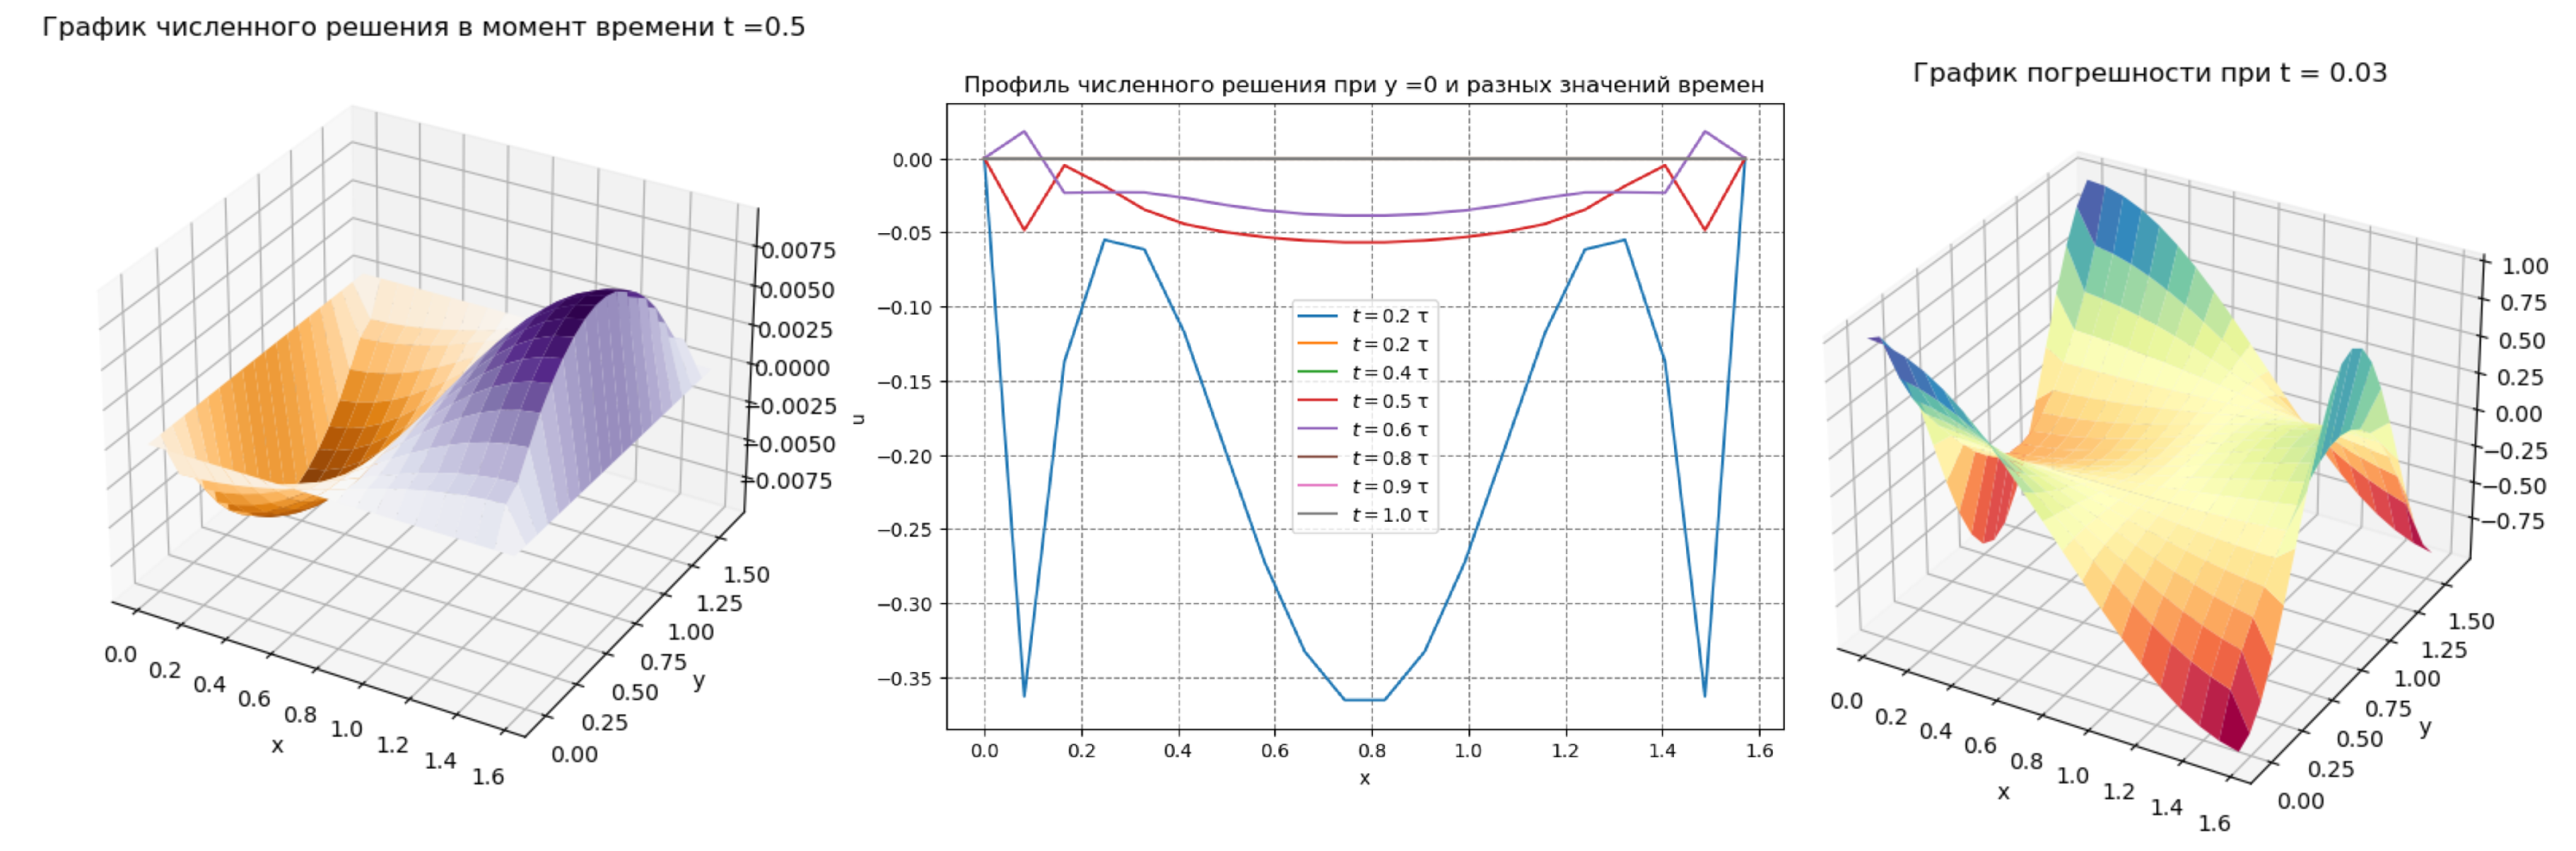

N = M = J = 50

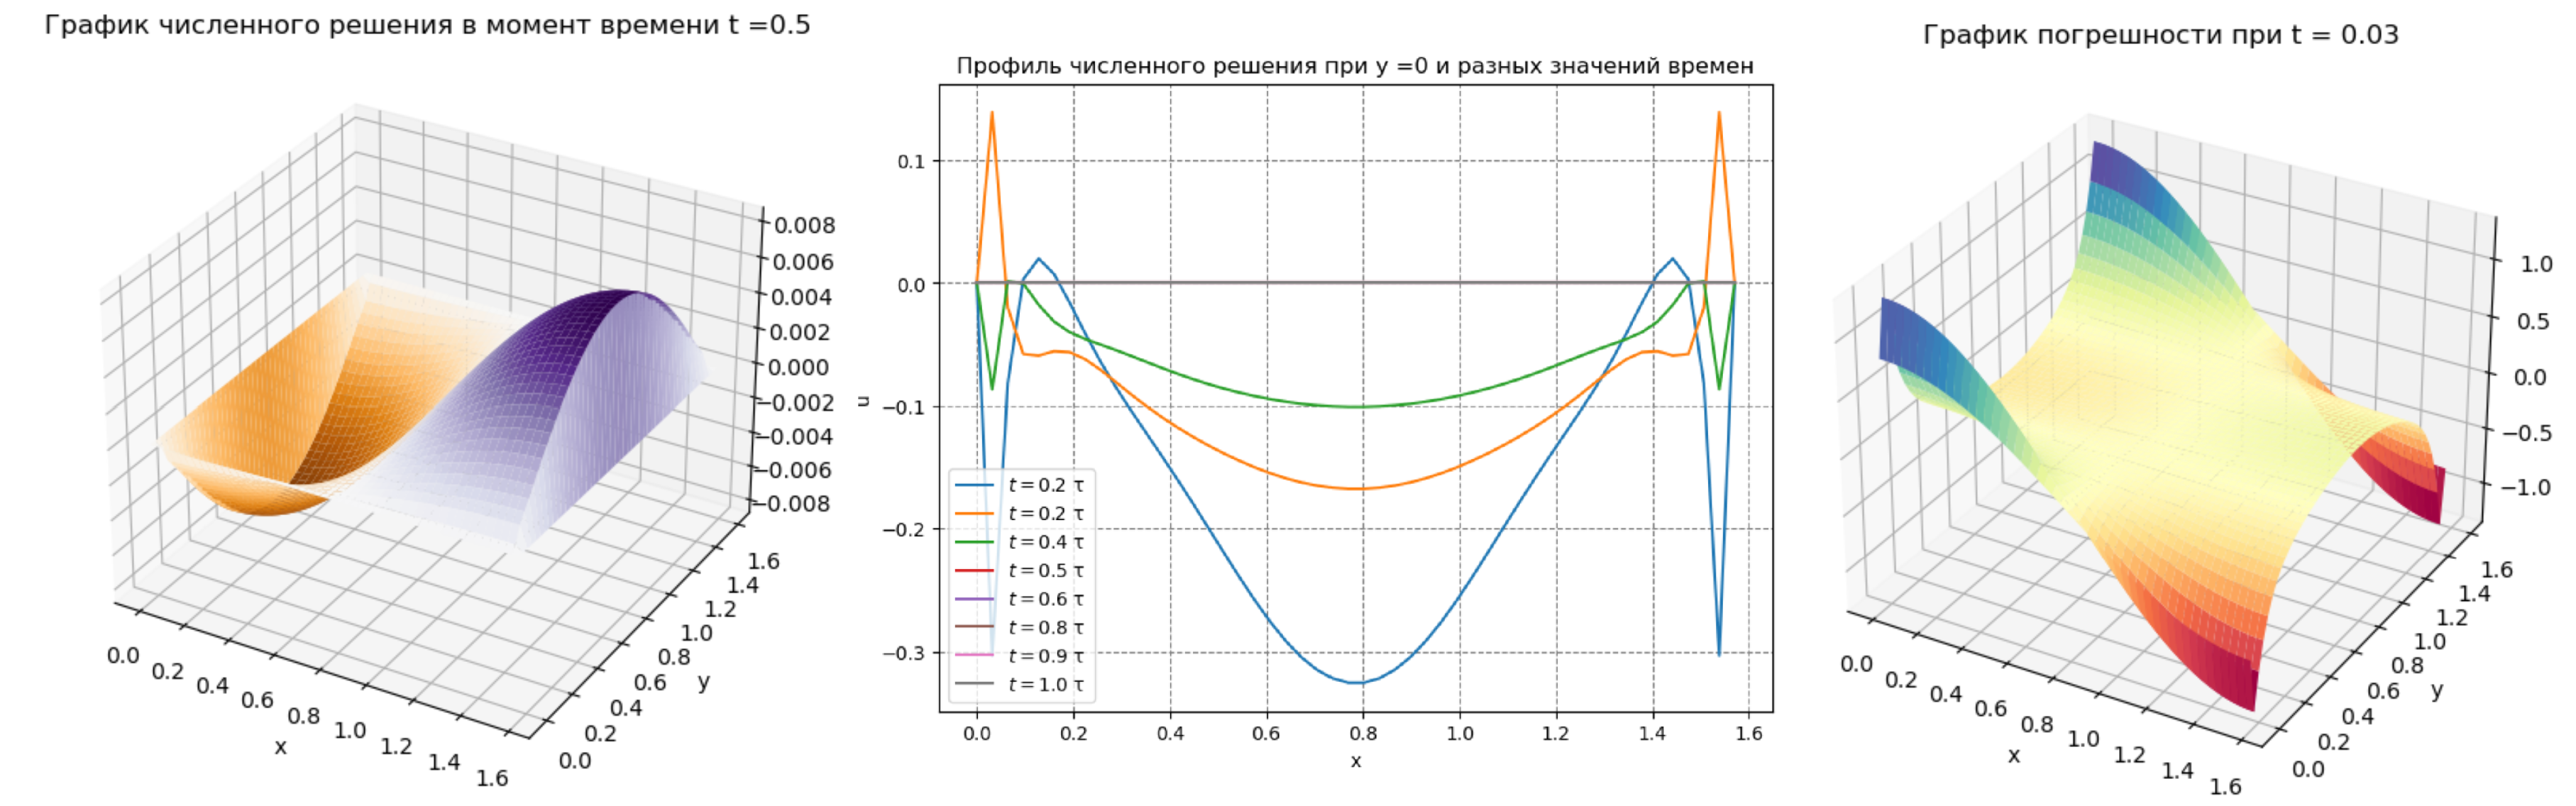

N = M = J = 100

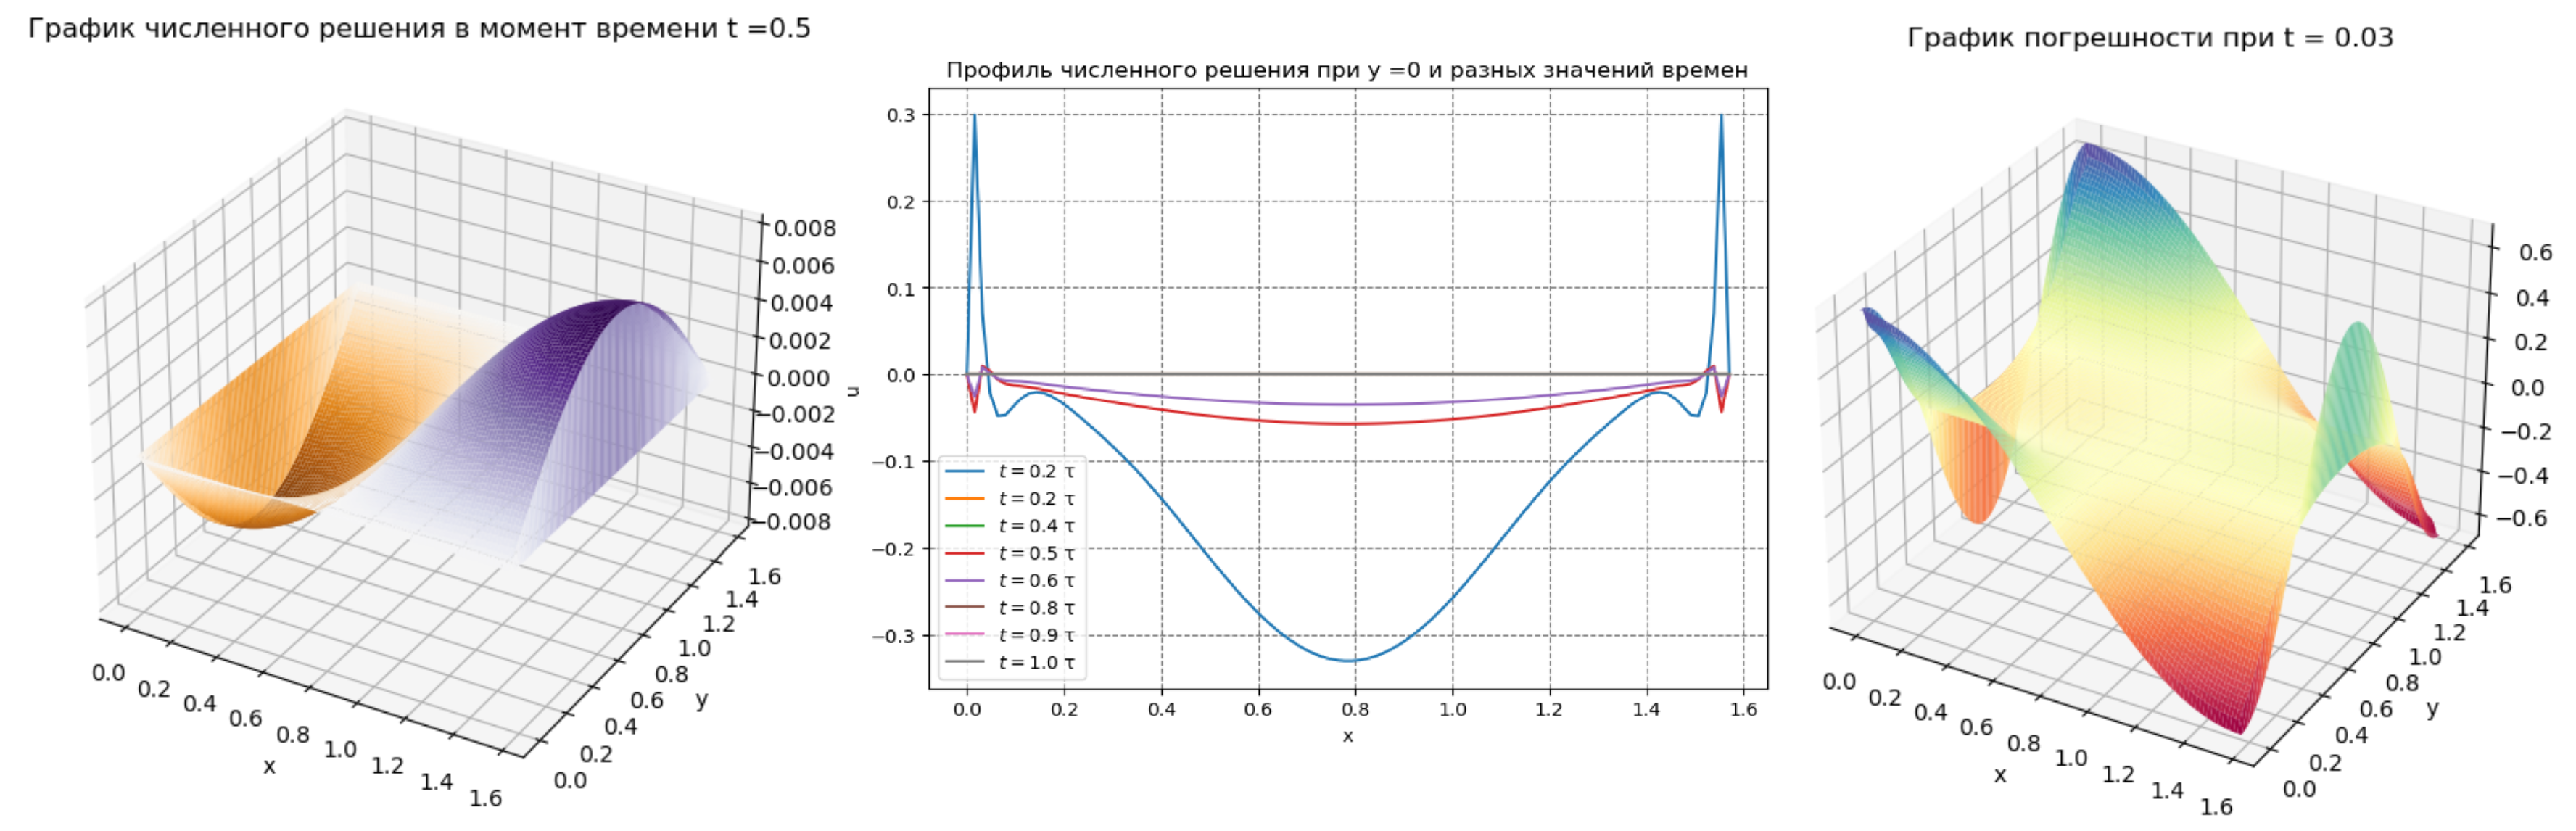